<a href="https://colab.research.google.com/github/matheus217/robotica/blob/master/manhatam_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
KP = 5.0  # attractive potential gain
ETA = 100.0  # repulsive potential gain
AREA_WIDTH = 30.0  # potential area width [m]

show_animation = True


def calc_potential_field(gx, gy, ox, oy, reso, rr):
    minx = min(ox) - AREA_WIDTH / 2.0
    miny = min(oy) - AREA_WIDTH / 2.0
    maxx = max(ox) + AREA_WIDTH / 2.0
    maxy = max(oy) + AREA_WIDTH / 2.0
    xw = int(round((maxx - minx) / reso))
    yw = int(round((maxy - miny) / reso))

    # calc each potential
    pmap = [[0.0 for i in range(yw)] for i in range(xw)]

    for ix in range(xw):
        x = ix * reso + minx

        for iy in range(yw):
            y = iy * reso + miny
            ug = calc_attractive_potential(x, y, gx, gy)
            uo = calc_repulsive_potential(x, y, ox, oy, rr)
            uf = ug + uo
            pmap[ix][iy] = uf

    return pmap, minx, miny


def calc_attractive_potential(x, y, gx, gy):
    return 0.5 * KP * np.hypot(x - gx, y - gy)


def calc_repulsive_potential(x, y, ox, oy, rr):
    # search nearest obstacle
    minid = -1
    dmin = float("inf")
    for i, _ in enumerate(ox):
        d = np.hypot(x - ox[i], y - oy[i])
        if dmin >= d:
            dmin = d
            minid = i

    # calc repulsive potential
    dq = np.hypot(x - ox[minid], y - oy[minid])

    if dq <= rr:
        if dq <= 0.1:
            dq = 0.1

        return 0.5 * ETA * (1.0 / dq - 1.0 / rr) ** 2
    else:
        return 0.0


def get_motion_model():
    # dx, dy
    motion = [[1, 0],
              [0, 1],
              [-1, 0],
              [0, -1],
              [-1, -1],
              [-1, 1],
              [1, -1],
              [1, 1]]

    return motion


def potential_field_planning(sx, sy, gx, gy, ox, oy, reso, rr):

    # calc potential field
    pmap, minx, miny = calc_potential_field(gx, gy, ox, oy, reso, rr)

    # search path
    d = np.hypot(sx - gx, sy - gy)
    ix = round((sx - minx) / reso)
    iy = round((sy - miny) / reso)
    gix = round((gx - minx) / reso)
    giy = round((gy - miny) / reso)

    if show_animation:
        draw_heatmap(pmap)
        plt.plot(ix, iy, "*k")
        plt.plot(gix, giy, "*m")

    rx, ry = [sx], [sy]
    motion = get_motion_model()
    while d >= reso:
        minp = float("inf")
        minix, miniy = -1, -1
        for i, _ in enumerate(motion):
            inx = int(ix + motion[i][0])
            iny = int(iy + motion[i][1])
            if inx >= len(pmap) or iny >= len(pmap[0]):
                p = float("inf")  # outside area
            else:
                p = pmap[inx][iny]
            if minp > p:
                minp = p
                minix = inx
                miniy = iny
        ix = minix
        iy = miniy
        xp = ix * reso + minx
        yp = iy * reso + miny
        d = np.hypot(gx - xp, gy - yp)
        rx.append(xp)
        ry.append(yp)

        if show_animation:
            plt.plot(ix, iy, ".r")
            plt.pause(0.01)

    print("Goal!!")

    return rx, ry


def draw_heatmap(data):
    data = np.array(data).T
    plt.pcolor(data, vmax=100.0, cmap=plt.cm.Blues)


def main():
    print("potential_field_planning start")

    sx = 8.0  # start x position [m]
    sy = 17.0  # start y positon [m]
    gx = 42.0  # goal x position [m]
    gy = 33.0  # goal y position [m]
    grid_size = 0.5  # potential grid size [m]
    robot_radius = 5.0  # robot radius [m]

    ox = [14.0, 37.0, 25.0, 10.0, 34]  # obstacle x position list [m]
    oy = [11.0, 10.0, 26.0, 34.0, 42]  # obstacle y position list [m]

    if show_animation:
        plt.grid(True)
        plt.axis("equal")

    # path generation
    x,y = potential_field_planning(
        sx, sy, gx, gy, ox, oy, grid_size, robot_radius)

    if show_animation:
        plt.show()
        plt.plot(x,y)


potential_field_planning start


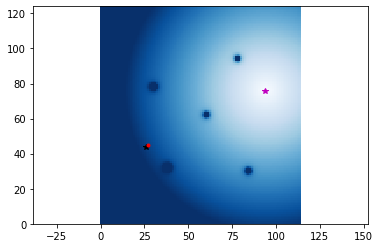

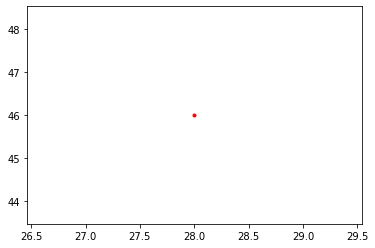

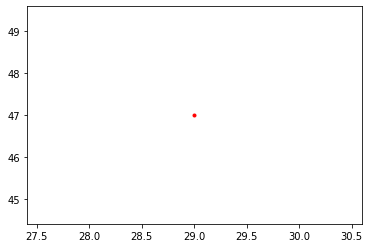

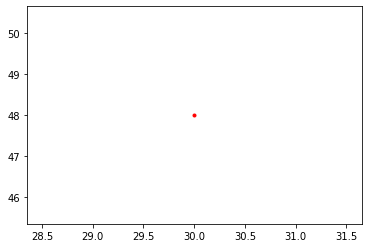

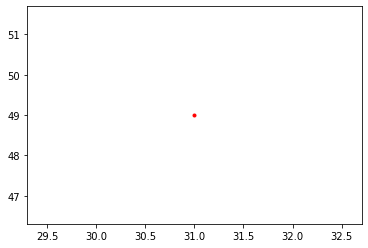

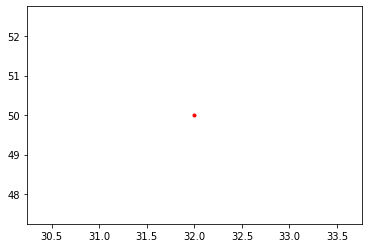

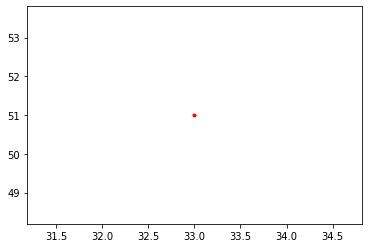

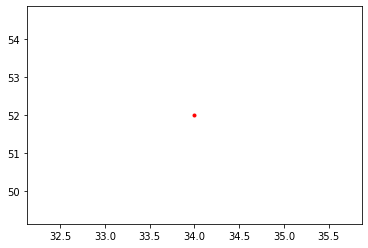

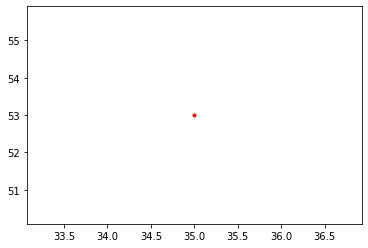

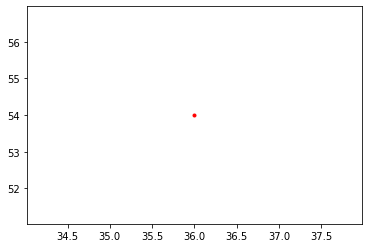

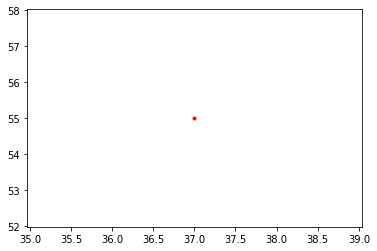

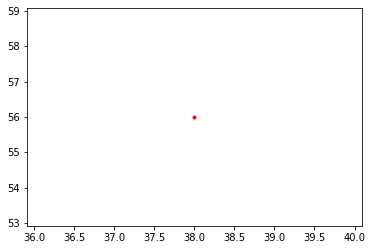

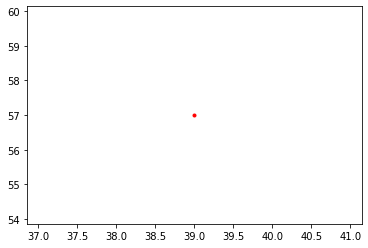

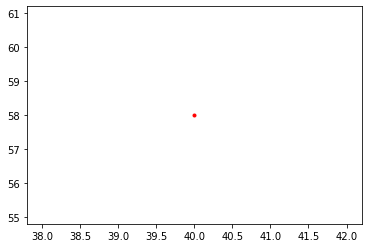

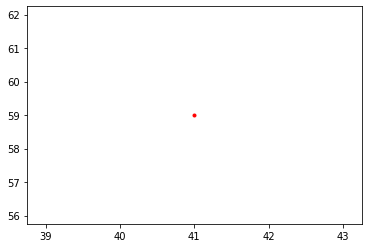

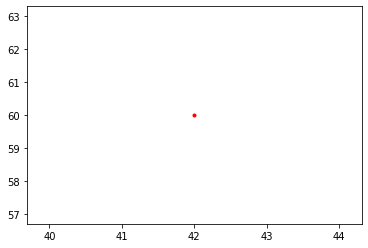

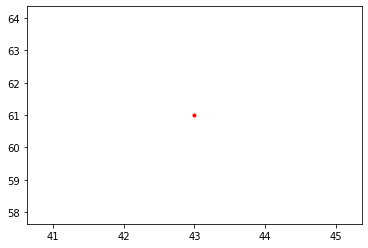

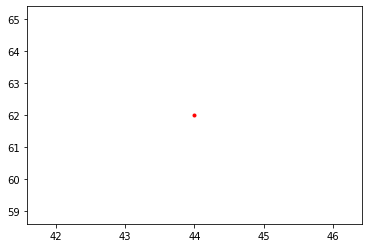

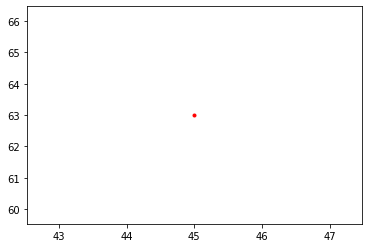

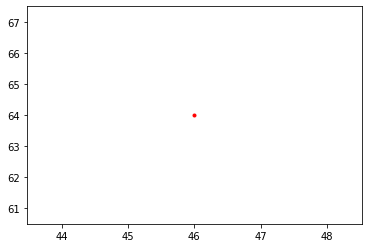

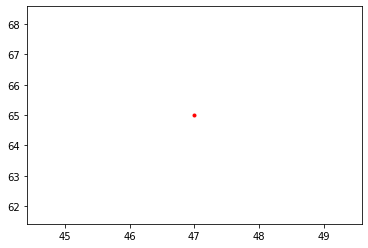

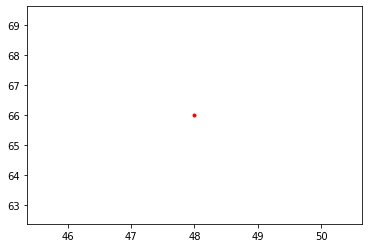

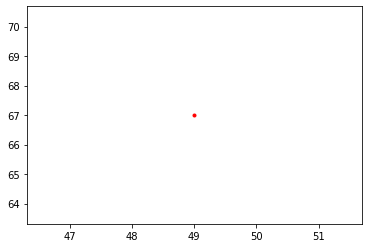

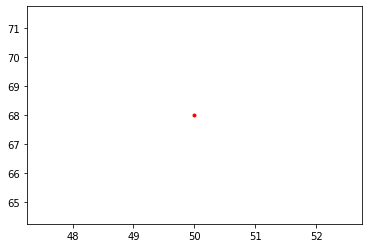

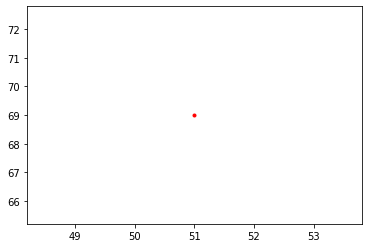

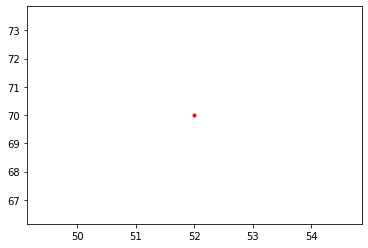

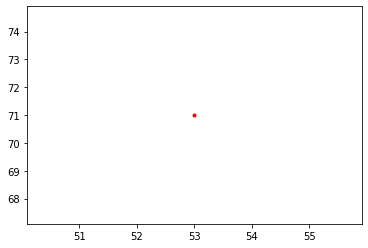

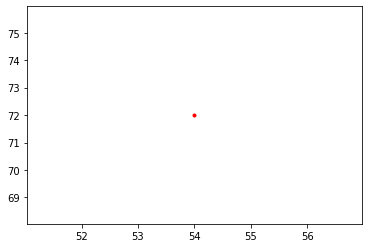

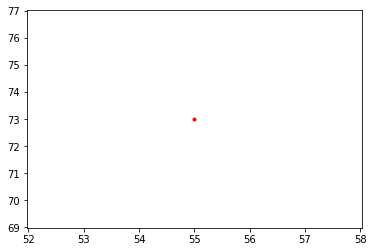

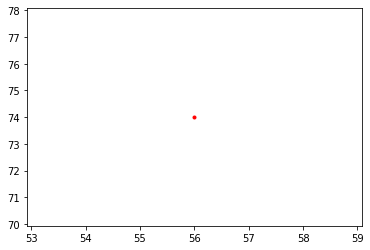

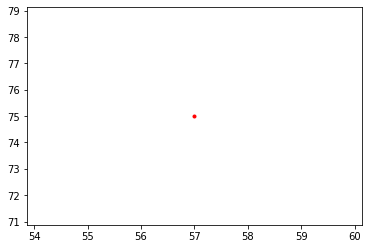

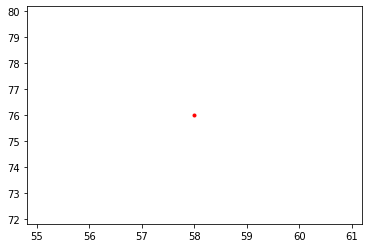

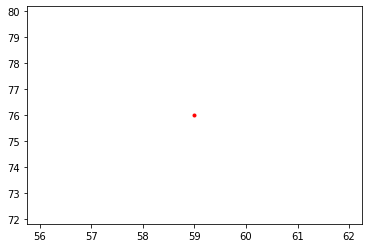

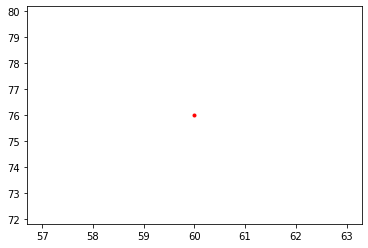

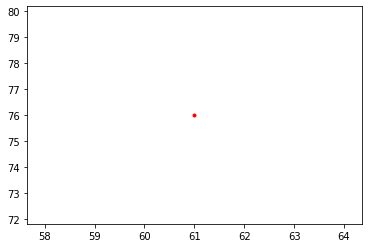

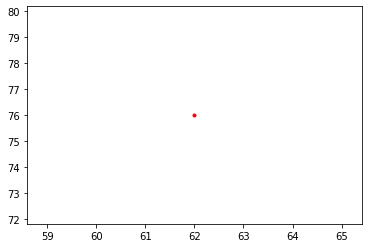

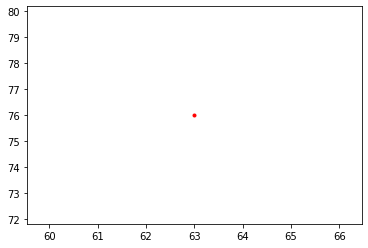

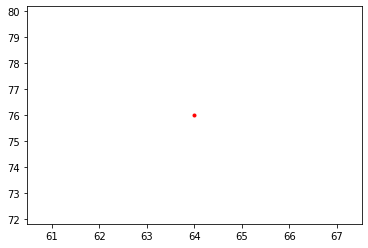

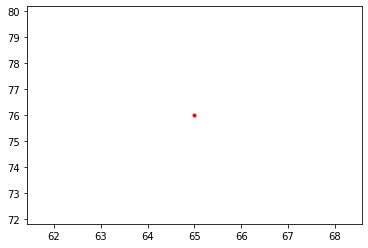

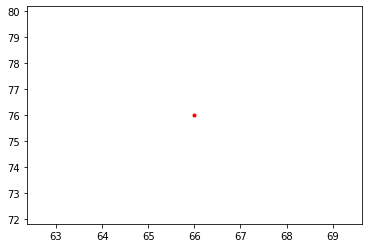

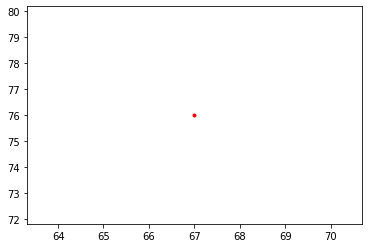

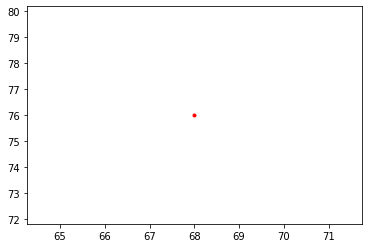

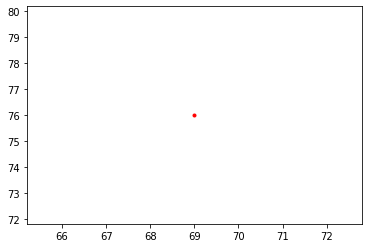

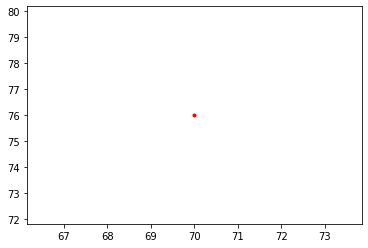

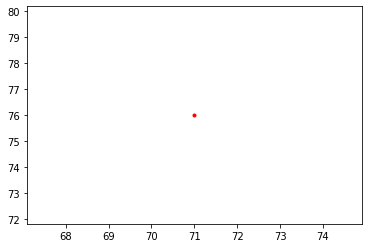

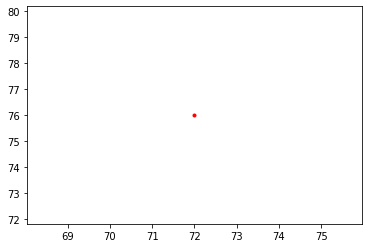

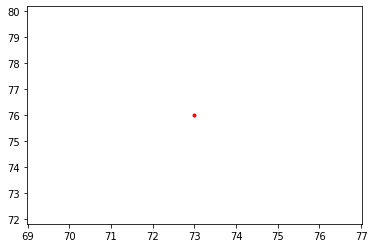

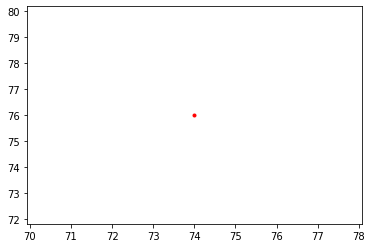

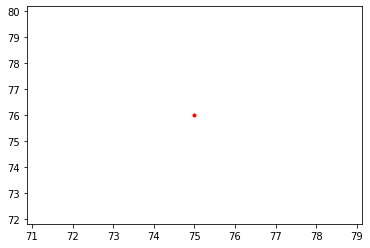

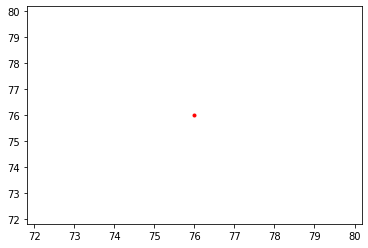

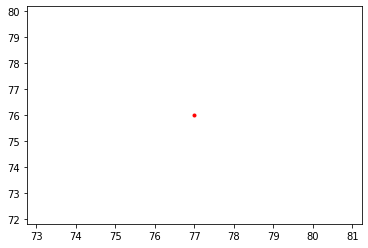

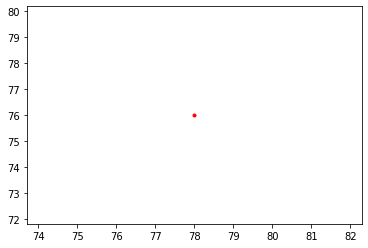

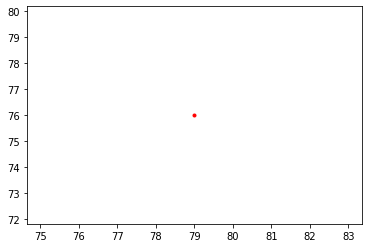

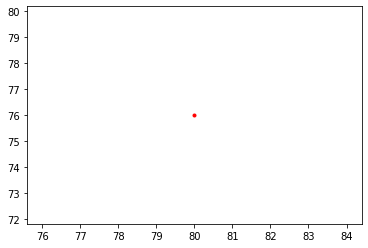

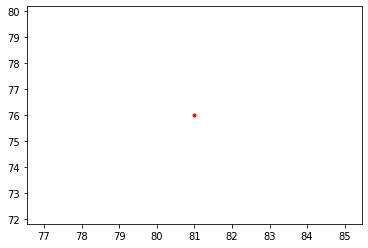

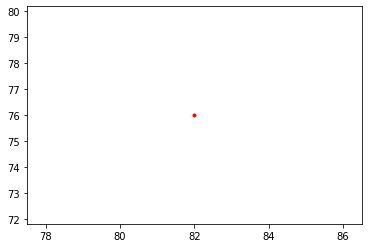

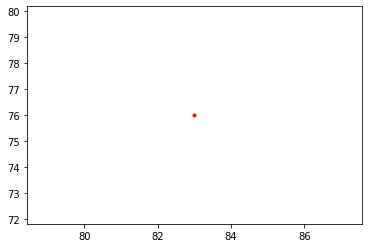

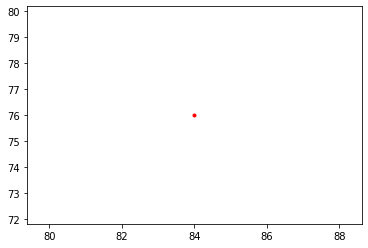

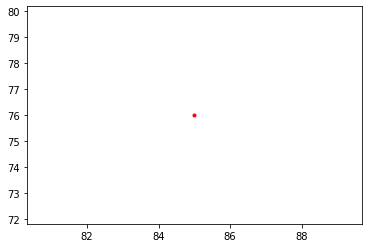

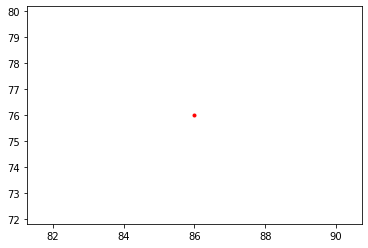

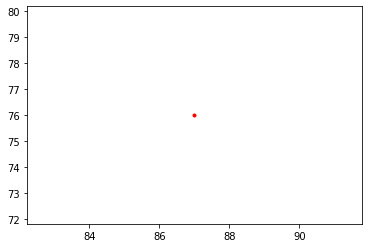

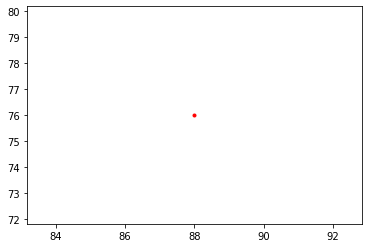

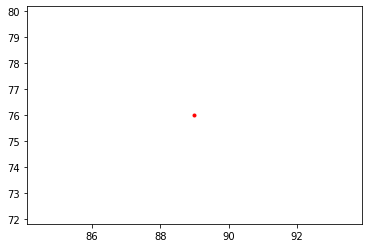

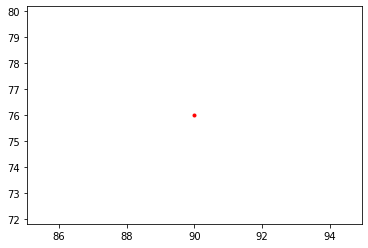

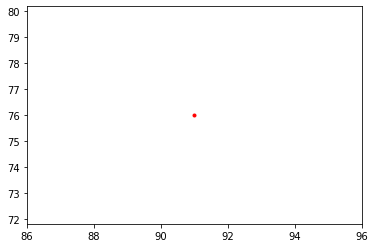

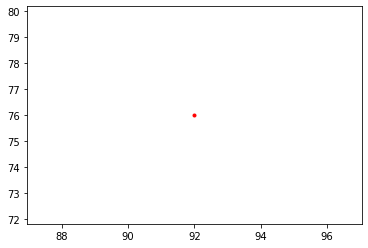

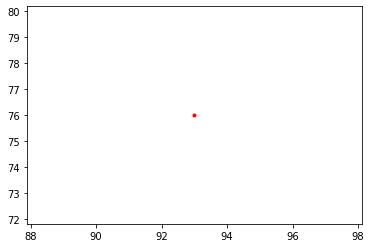

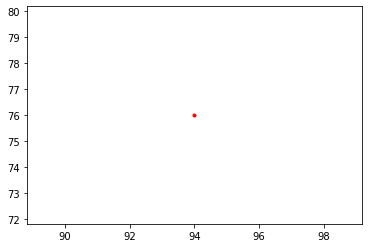

Goal!!


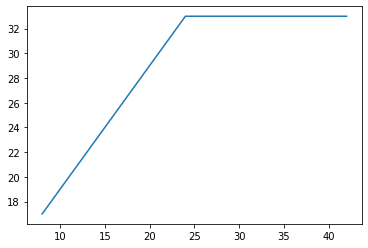

In [25]:
main()